# Визуализация сверточных слоев глубокой нейронной сети

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, model_from_json
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

## Выбираем фото для демонстрации

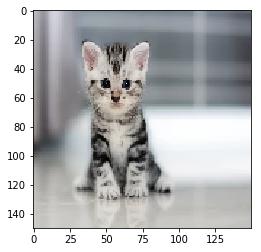

In [7]:
image_file_name = '11cat.jpeg'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

### Преобразуем фотографию в массив numpy

In [0]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

## Загружаем обученную модель CNN

In [0]:
# Загружаем данные об архитектуре сети из файла json
json_file = open("cats_and_dogs_cnn.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данны х
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("cats_and_dogs_cnn.h5")

In [10]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

## "Обрезаем" модель на нужном слое

In [0]:
# Номера сверточных слоев - 0, 3, 6
activation_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[0].output)

In [13]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## Запускаем изображение в обрезанную модель

In [0]:
activation = activation_model.predict(img_array)

In [15]:
print(activation.shape)

(1, 148, 148, 32)


## Показываем результаты работы модели

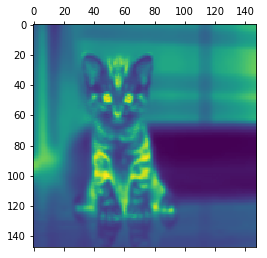

In [27]:
plt.matshow(activation[0, :, :, 31], cmap='viridis')

## Печатаем вывод всех карт признаков

In [0]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [0]:
display_grid = np.zeros((n_cols * size, images_per_row * size))

In [0]:
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

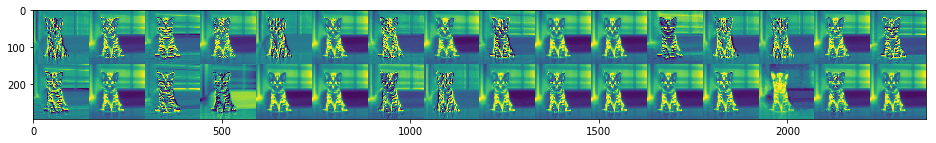

In [24]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')